# Classification model using Decision Tree

### 1. Import libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

### 2. Upload RNA data

In [5]:
path ='../../../Data_preprocessing//RNA post_autoencoder+Clinic joined/Clinical_data_and_RNA_total_Features_PFS.csv'
data = pd.read_csv(path)
data.head(5)

,Unnamed: 0,RNA_ID,Age,Sarc,Rhab,Number_of_Prior_Therapies,Days_from_TumorSample_Collection_and_Start_of_Trial_Therapy,Tumor_Shrinkage,PFS,TM_TC_Ratio,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
0,0,G138701_RCCBMS-00097-T_v1_RNA_OnPrem,62.0,0.0,0.0,2.0,707.0,0.0,5.490411,1.374775,...,0.979436,0.927694,0.847157,0.927951,0.954266,0.702499,0.924324,0.947513,0.977068,0.974450
1,1,G138701_RCCBMS-00099-T_v1_RNA_OnPrem,62.0,0.0,0.0,3.0,707.0,0.0,1.249315,1.374775,...,0.942790,0.904091,0.916965,0.984643,0.951518,0.702499,0.985716,0.926652,0.977485,0.952089
2,2,G138701_RCCBMS-00163-T_v1_RNA_OnPrem,62.0,0.0,0.0,2.0,707.0,0.0,5.654795,1.374775,...,0.899643,0.895334,0.962866,0.971061,0.941744,0.891154,0.966061,0.927933,0.938855,0.929364
3,3,G138701_RCCBMS-00116-T_v1_RNA_OnPrem,62.0,0.0,0.0,2.0,707.0,0.0,1.216438,1.374775,...,0.930375,0.920000,0.906820,0.965345,0.989037,0.890711,0.953759,0.925267,0.984474,0.978449
4,4,G138701_RCCBMS-00136-T_v1_RNA_OnPrem,62.0,0.0,0.0,2.0,707.0,0.0,2.860274,1.374775,...,0.909491,0.933381,0.970506,0.962001,0.965852,0.690264,0.961500,0.933123,0.962010,0.945552


In [6]:
X = data.iloc[:,28:43921  ] 
Y = []
for i in range (len(data)):
    if data.PFS[i]<3: # If PFS is lower than 3 months, I will consider it as NonResponder (NR)
        Y.append(0)
    elif data.PFS[i]<6:
        Y.append(1)
    else:
        Y.append(2)
print(X)


      5S_rRNA       7SK      A1BG  A1BG-AS1      A1CF       A2M   A2M-AS1  \
0    0.716961  0.901091  0.899331  0.731610  0.876518  0.983111  0.761715   
1    0.716961  0.920955  0.639678  0.731610  0.865551  0.977815  0.761715   
2    0.716961  0.929084  0.893207  0.731610  0.903742  0.941019  0.928798   
3    0.716540  0.917331  0.897599  0.808758  0.747520  0.954937  0.598825   
4    0.714991  0.956733  0.881020  0.758973  0.915812  0.961075  0.919822   
..        ...       ...       ...       ...       ...       ...       ...   
139  0.716941  0.894894  0.837912  0.841613  0.949286  0.965205  0.891619   
140  0.716961  0.940873  0.765798  0.731610  0.645358  0.997207  0.761715   
141  0.714991  0.930476  0.923901  0.914943  0.713713  0.980062  0.959801   
142  0.714991  0.916554  0.926047  0.787616  0.868364  0.972652  0.807885   
143  0.714991  0.943652  0.908784  0.677136  0.938951  0.957465  0.836984   

        A2ML1  A2ML1-AS1     A2MP1  ...    ZWILCH     ZWINT      ZXDA  \
0 

### 3. Train-Test dataset split

In [7]:
XTrain, XTest, yTrain, yTest = train_test_split(X, Y, test_size=0.20, random_state=125)
# Convert sets to arrays

XTrain = XTrain.values
XTest = XTest.values

print('Training set size:', len(XTrain))
print('Target column size of the training set:', len(yTrain))
print('Test set size:', len(XTest))
print('Target column size of the test set:', len(yTest))

Training set size: 115
Target column size of the training set: 115
Test set size: 29
Target column size of the test set: 29


### 4. Select the parameters of the model and fit it

In [8]:
param_grid = {'min_samples_leaf': [2,5,7],
              'min_samples_split': [2, 5],
              'max_depth':[2,5,10,12],
              'criterion':['entropy','gini'],
              'splitter': ['best', 'random'],
              'random_state':[125]}

# Creamos un GridSearchCV que permite evaluar y seleccionar de forma sistemática los parámetros de nuestro modelo. 
# Indicándole un modelo y los parámetros a probar, puede evaluar el rendimiento del primero en función de los 
# segundos mediante validación cruzada.
clf = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5)

clf.fit(XTrain , yTrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [2, 5, 10, 12],
                         'min_samples_leaf': [2, 5, 7],
                         'min_samples_split': [2, 5], 'random_state': [125],
                         'splitter': ['best', 'random']})

In [9]:
print("Best estimate of parameters according to GridSearchCV:")
model = clf.best_estimator_
# Fit the model with the best parameters
model.fit(XTrain , yTrain)

Best estimate of parameters according to GridSearchCV:


DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=7,
                       random_state=125, splitter='random')

In [10]:
print("Best result of the cross validation of the model with the best paramters:" +str(clf.best_score_))

Best result of the cross validation of the model with the best paramters:0.5652173913043479


### 5. Prediction

In [11]:
# Making predictions with the optimal model on the training dataset
yhatTrain = model.predict(XTrain)
contTrain = 0

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(yTrain),1) :
    if (yhatTrain[i] == yTrain[i]):
        contTrain = contTrain + 1

In [12]:
# Making predictions with the optimal model on the test dataset
yhatTest = model.predict(XTest)
contTest = 0

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(yTest),1) :
    if (yhatTest[i] == yTest[i]):
        contTest = contTest + 1


### 6. Results

In [13]:
print('Final accuracy on the training dataset:' + str(contTrain/len(yTrain)))
print('Final accuracy on the testing dataset: ' + str(contTest/len(yTest)))

Final accuracy on the training dataset:0.8521739130434782
Final accuracy on the testing dataset: 0.3793103448275862


In [14]:
from sklearn.metrics import classification_report,confusion_matrix

print('----------------Confusion Matrix (Training)------------------')
print(confusion_matrix(yTrain,yhatTrain))
print('Input data:  ' + str(np.array(yTrain)))
print('Prediction:        ' +str(yhatTrain))

----------------Confusion Matrix (Training)------------------
[[60  3  3]
 [ 4 22  1]
 [ 3  3 16]]
Input data:  [0 0 2 2 0 1 0 1 1 1 0 1 0 0 0 0 2 0 0 1 0 0 0 0 0 2 2 2 0 0 0 2 1 0 0 0 2
 1 0 0 0 0 2 1 1 0 1 0 1 0 0 2 1 2 0 0 0 0 1 0 2 2 1 0 0 0 0 2 0 2 2 0 0 0
 0 2 1 0 0 1 1 0 2 0 0 0 0 2 1 1 0 0 2 1 0 2 0 1 1 0 2 0 0 0 1 0 1 0 0 0 1
 0 1 0 0]
Prediction:        [0 0 2 2 2 1 0 1 1 1 0 1 0 1 0 0 2 0 1 1 0 0 0 0 0 1 0 2 0 0 0 2 1 1 0 0 2
 1 0 0 0 2 2 1 2 0 1 0 0 0 0 2 1 0 0 0 0 0 1 0 2 2 0 0 0 0 0 2 0 2 0 0 0 0
 0 1 1 0 0 1 1 0 2 0 0 0 2 2 1 1 0 0 2 1 0 2 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1
 0 1 0 0]


In [15]:
print(classification_report(yTrain,yhatTrain))

              precision    recall  f1-score   support

           0       0.90      0.91      0.90        66
           1       0.79      0.81      0.80        27
           2       0.80      0.73      0.76        22

    accuracy                           0.85       115
   macro avg       0.83      0.82      0.82       115
weighted avg       0.85      0.85      0.85       115



In [16]:
print('----------------Confusion Matrix (Test)------------------')
print(confusion_matrix(yTest,yhatTest))
print('Input data:  ' + str(np.array(yTest)))
print('Prediction:        ' +str(yhatTest))

----------------Confusion Matrix (Test)------------------
[[9 5 5]
 [1 1 2]
 [4 1 1]]
Input data:  [2 0 2 0 0 2 2 0 2 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 2 0 0 1 0]
Prediction:        [0 1 0 2 2 0 2 0 0 1 2 1 0 1 2 0 0 1 0 2 0 2 0 0 1 1 0 2 0]


In [17]:
print(classification_report(yTest,yhatTest))

              precision    recall  f1-score   support

           0       0.64      0.47      0.55        19
           1       0.14      0.25      0.18         4
           2       0.12      0.17      0.14         6

    accuracy                           0.38        29
   macro avg       0.30      0.30      0.29        29
weighted avg       0.47      0.38      0.41        29



### 7. Result visualization

In [18]:
X = data.iloc[1:,2:43895] 
print(X)
cols = []
for i in X:
    if i!= 'Target_uniclass' and i!= 'Target_multiclass':
        cols.append(i)


      Age  Sarc  Rhab  Number_of_Prior_Therapies  \
1    62.0   0.0   0.0                        3.0   
2    62.0   0.0   0.0                        2.0   
3    62.0   0.0   0.0                        2.0   
4    62.0   0.0   0.0                        2.0   
5    62.0   0.0   0.0                        2.0   
..    ...   ...   ...                        ...   
139  62.0   0.0   0.0                        1.0   
140  62.0   0.0   0.0                        1.0   
141  62.0   0.0   0.0                        1.0   
142  62.0   0.0   0.0                        1.0   
143  62.0   0.0   0.0                        1.0   

     Days_from_TumorSample_Collection_and_Start_of_Trial_Therapy  \
1                                                707.0             
2                                                707.0             
3                                                707.0             
4                                                707.0             
5                                  

In [19]:
from sklearn.tree import export_text

texto_modelo = export_text(
                    decision_tree = model,
                    feature_names = cols
               )
print(texto_modelo)

|--- RP11-452J21.2 <= 0.76
|   |--- WI2-2373I1.1 <= 0.93
|   |   |--- EFHC2 <= 0.95
|   |   |   |--- INHBB <= 0.97
|   |   |   |   |--- ADAMTS19-AS1 <= 0.95
|   |   |   |   |   |--- DUXAP7 <= 0.91
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |--- DUXAP7 >  0.91
|   |   |   |   |   |   |--- DNM1P31 <= 0.95
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- DNM1P31 >  0.95
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- ADAMTS19-AS1 >  0.95
|   |   |   |   |   |--- class: 0
|   |   |   |--- INHBB >  0.97
|   |   |   |   |--- class: 1
|   |   |--- EFHC2 >  0.95
|   |   |   |--- CHMP5 <= 0.75
|   |   |   |   |--- class: 0
|   |   |   |--- CHMP5 >  0.75
|   |   |   |   |--- class: 1
|   |--- WI2-2373I1.1 >  0.93
|   |   |--- PRNT <= 0.77
|   |   |   |--- class: 1
|   |   |--- PRNT >  0.77
|   |   |   |--- class: 0
|--- RP11-452J21.2 >  0.76
|   |--- class: 2



Tree depth: 7
Number of terminal nodes : 10


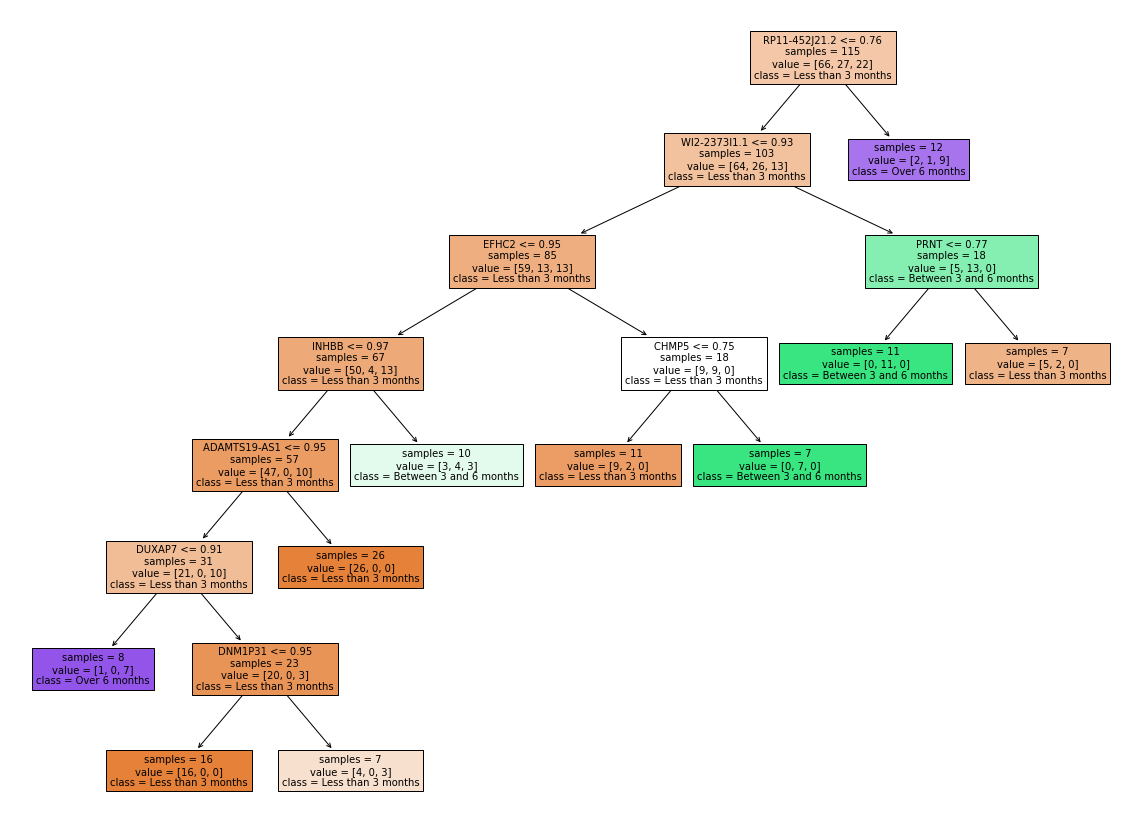

In [20]:
from sklearn.tree import plot_tree

fig, ax = plt.subplots(figsize=(20, 15))

print(f"Tree depth: {model.get_depth()}")
print(f"Number of terminal nodes : {model.get_n_leaves()}")

plot = plot_tree(
            decision_tree = model,
            feature_names = cols,
            class_names   = ['Less than 3 months','Between 3 and 6 months','Over 6 months'],
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )